### Les Colonnes:

- UDI : Identifiant unique pour chaque observation

- Product ID : Identifiant du produit

- Type : Type de produit (L = Low, M = Medium, H = High)

- Air temperature [K] : Température de l’air ambiant (en Kelvin).

- Process temperature [K] : Température du processus/machine (en Kelvin).

- Rotational speed [rpm] : Vitesse de rotation de l’arbre de la machine (tours/minute).

- Torque [Nm] : Couple appliqué (en Newton-mètre).

- Tool wear [min] : Temps d’usure de l’outil (en minutes).

- Machine failure : Indique si la machine est tombée en panne :
0 = Pas de panne / 1 = Panne

- TWF (Tool Wear Failure) : Panne due à l’usure de l’outil.

- HDF (Heat Dissipation Failure) : Panne due à une mauvaise dissipation thermique.

- PWF (Power Failure) : Panne électrique.

- OSF (Overstrain Failure) : Panne due à une surcharge mécanique.

- RNF (Random Failure) : Panne aléatoire.

### ***L'importation des bibliothèques nécessaires:***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


### ***Charger les données:***

In [2]:
import pandas as pd
df= pd.read_csv("ai4i2020.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


### ***Exploration Initiale des Données::***

In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [6]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


### ***Nettoyage des donnes:***

#### ***Vérifier les valeurs manquantes:***

In [7]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

##### ***Vérification des doublons:***

In [8]:
print(f"Nombre de doublons : {df.duplicated().sum()}")

# # Supprimer les doublons
# df = df.drop_duplicates()

Nombre de doublons : 0


#### ***Detection des valeurs abberants:***

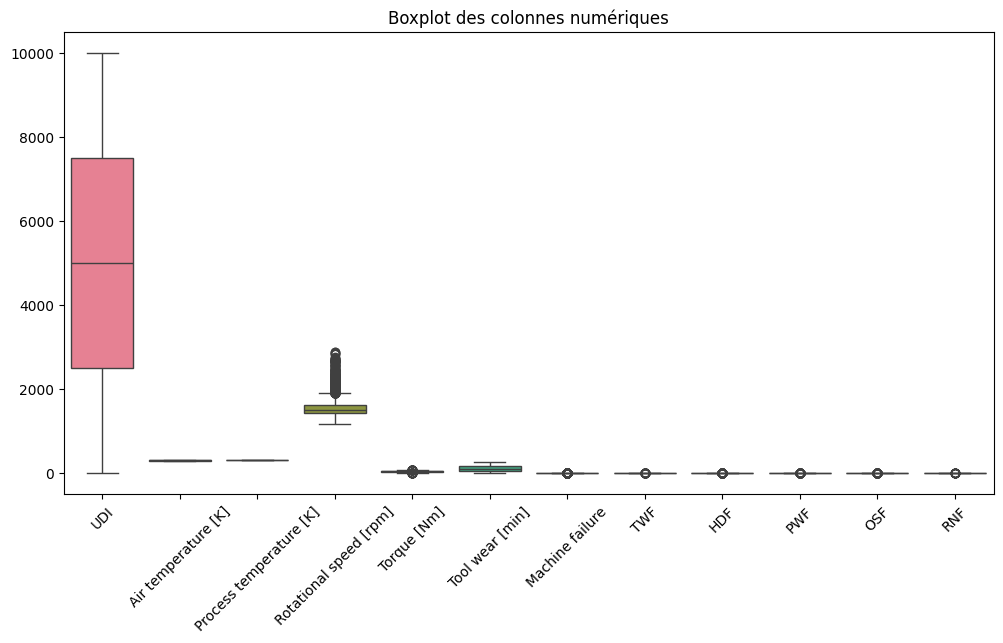

In [9]:
#detection des valeurs aberrantes
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title("Boxplot des colonnes numériques")
plt.xticks(rotation=45)
plt.show()

#### ***pour detecter les outliers de la variable "Rotational speed [rpm]"***


In [10]:
#pour detecter les outliers de la variable "Rotational speed [rpm]"
Q1 = df["Rotational speed [rpm]"].quantile(0.25)
Q3 = df["Rotational speed [rpm]"].quantile(0.75)
IQR = Q3 - Q1

I1 = Q1 - 1.5 * IQR
I2 = Q3 + 1.5 * IQR
print(I1,  I2)
# #pour supprimer les outliers
df = df[(df["Rotational speed [rpm]"] > I1) & (df["Rotational speed [rpm]"] < I2)]

1139.5 1895.5


#### ***pour detecter les outliers de la variable "Torque [Nm]"***

In [11]:
#pour detecter les outliers de la variable "Torque [Nm]"
Q1 = df["Torque [Nm]"].quantile(0.25)
Q3 = df["Torque [Nm]"].quantile(0.75)
IQR = Q3 - Q1

I1 = Q1 - 1.5 * IQR
I2 = Q3 + 1.5 * IQR
print(I1,  I2)
# #pour supprimer les outliers
df = df[(df["Torque [Nm]"] > I1) & (df["Torque [Nm]"] < I2)]

14.850000000000005 66.45


#### ***pour detecter les outliers de la variable "Tool wear [min]"***

In [12]:
#pour detecter les outliers de la variable "Tool wear [min]"
Q1 = df["Tool wear [min]"].quantile(0.25)
Q3 = df["Tool wear [min]"].quantile(0.75)
IQR = Q3 - Q1

I1 = Q1 - 1.5 * IQR
I2 = Q3 + 1.5 * IQR
print(I1,  I2)
# #pour supprimer les outliers
df = df[(df["Tool wear [min]"] > I1) & (df["Tool wear [min]"] < I2)]

-110.5 325.5


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9535 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      9535 non-null   int64  
 1   Product ID               9535 non-null   object 
 2   Type                     9535 non-null   object 
 3   Air temperature [K]      9535 non-null   float64
 4   Process temperature [K]  9535 non-null   float64
 5   Rotational speed [rpm]   9535 non-null   int64  
 6   Torque [Nm]              9535 non-null   float64
 7   Tool wear [min]          9535 non-null   int64  
 8   Machine failure          9535 non-null   int64  
 9   TWF                      9535 non-null   int64  
 10  HDF                      9535 non-null   int64  
 11  PWF                      9535 non-null   int64  
 12  OSF                      9535 non-null   int64  
 13  RNF                      9535 non-null   int64  
dtypes: float64(3), int64(9), obje

##### ***L'encodage:***

In [14]:
# Encoder la colonne
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Type"] = encoder.fit_transform(df["Type"])#Low=1, Medium=2, High=0

### ***Analyse Exploratoire des donnés:***

##### ***Histogrammes de chaque colonne numérique (pour voir la distribution)***

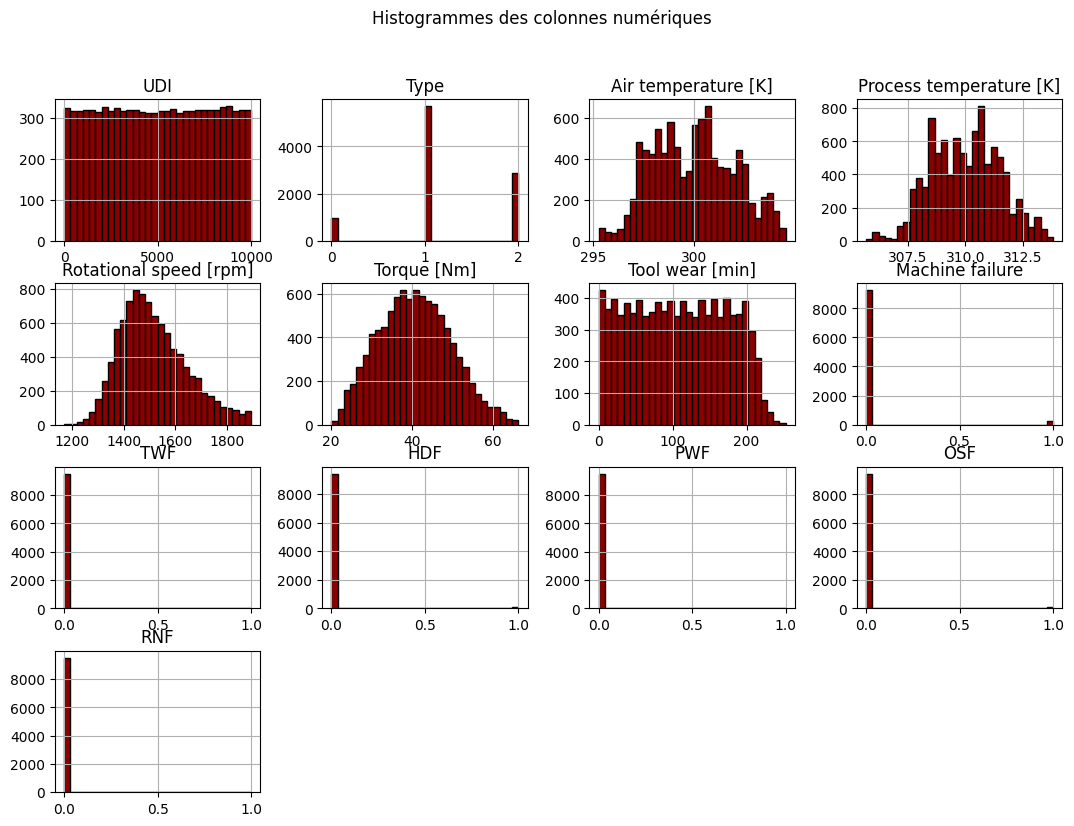

In [15]:
colonnes_numeriques = df.select_dtypes(include=[np.number]).columns
df[colonnes_numeriques].hist(figsize=(13, 9), bins=30, color="darkred", edgecolor="black")
plt.suptitle("Histogrammes des colonnes numériques")
plt.show()

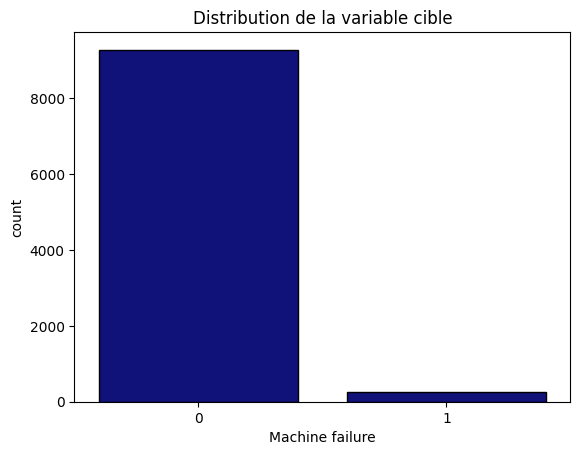

In [16]:
# Distribution des classes (target)
sns.countplot(x="Machine failure", data=df,color="darkblue", edgecolor="black")
plt.title("Distribution de la variable cible")
plt.show()

In [17]:
df.corr(numeric_only=True)

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,1.000000,0.008618,0.114552,0.322636,0.000407,0.000324,-0.012170,-0.017898,0.004237,-0.022415,-0.010616,-0.001613,-0.006151
Type,0.008618,1.000000,0.016918,0.012589,-0.006222,0.005968,-0.002592,-0.010970,-0.008831,0.000207,0.011923,-0.024630,-0.022607
Air temperature [K],0.114552,0.016918,1.000000,0.875566,0.013167,-0.007296,0.015834,0.090375,0.011408,0.138802,-0.004177,-0.000508,0.018414
Process temperature [K],0.322636,0.012589,0.875566,1.000000,0.015984,-0.011160,0.015526,0.038398,0.006187,0.057796,-0.009207,0.003162,0.023013
Rotational speed [rpm],0.000407,-0.006222,0.013167,0.015984,1.000000,-0.892611,0.006550,-0.169334,0.001388,-0.146234,-0.047992,-0.117564,-0.010448
Torque [Nm],0.000324,0.005968,-0.007296,-0.011160,-0.892611,1.000000,-0.006375,0.217396,-0.008881,0.142603,0.131439,0.177090,0.014594
Tool wear [min],-0.012170,-0.002592,0.015834,0.015526,0.006550,-0.006375,1.000000,0.120355,0.113544,-0.003168,-0.000730,0.153468,0.011565
Machine failure,-0.017898,-0.010970,0.090375,0.038398,-0.169334,0.217396,0.120355,1.000000,0.394941,0.641452,0.316407,0.573064,0.006834
TWF,0.004237,-0.008831,0.011408,0.006187,0.001388,-0.008881,0.113544,0.394941,1.000000,-0.007186,0.026259,0.043265,0.032541
HDF,-0.022415,0.000207,0.138802,0.057796,-0.146234,0.142603,-0.003168,0.641452,-0.007186,1.000000,-0.005757,0.040926,-0.004827


##### ***Heatmap des corrélations entre les colonnes***

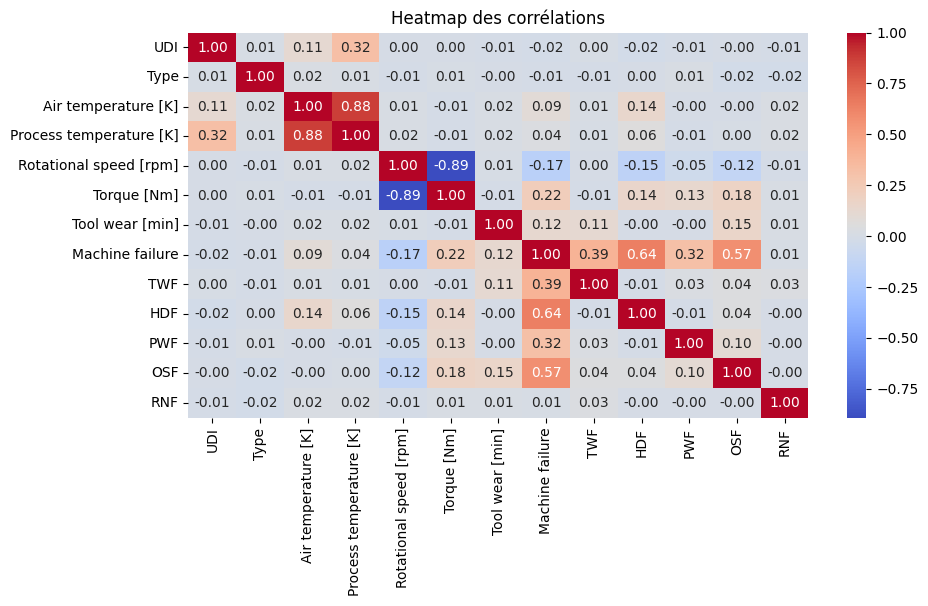

In [18]:
plt.figure(figsize=(10, 5))
sns.heatmap(df[colonnes_numeriques].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap des corrélations")
plt.show()

In [19]:
df["Machine failure"].value_counts()

Machine failure
0    9272
1     263
Name: count, dtype: int64

## 📉 Machine Learning:

### ***Partie: création de modèle Machine Learning***

#### ***1️⃣Preparation des données :***

In [20]:
# 1. Séparer les caractéristiques (X) et la cible (y)

X = df.drop(columns=["UDI", "Product ID", "Machine failure","TWF","HDF","PWF","OSF","RNF"])
y = df["Machine failure"]

# 2. Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
anomalies = iso.fit_predict(X_scaled)
anomalies = np.where(anomalies == -1, 1, 0)  # 1 = anomalie, 0 = normal

# 4. Filtrer les anomalies directement sur X et y déjà nettoyés
X_clean = X[anomalies == 0]
y_clean = y[anomalies == 0]

# 5. SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_clean, y_clean)



In [21]:
# diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (14116, 6)
X_test shape: (3530, 6)
y_train shape: (14116,)
y_test shape: (3530,)


#### ***2️⃣Entraînement du modèle:***

#### **LogisticRegression:**

Précision du modèle logistic Regression: 0.83
F1 Score: 0.83
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1765
           1       0.81      0.84      0.83      1765

    accuracy                           0.83      3530
   macro avg       0.83      0.83      0.83      3530
weighted avg       0.83      0.83      0.83      3530



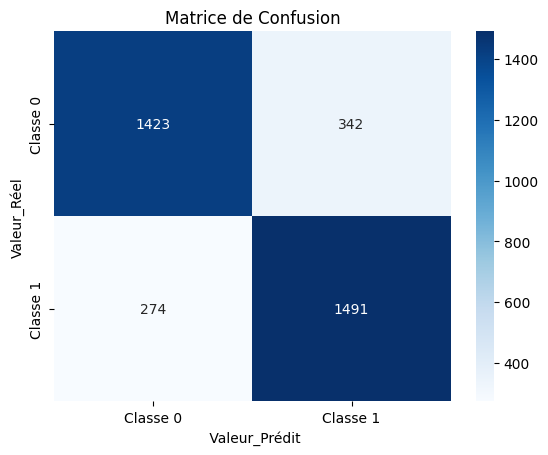

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred_logi = model.predict(X_test)


# Accuracy du modèle
accuracy_logi = accuracy_score(y_test, y_pred_logi)
print(f"Précision du modèle logistic Regression: {accuracy_logi:.2f}")

# F1-score du modèle
f1_logi = f1_score(y_test, y_pred_logi)
print(f"F1 Score: {f1_logi:.2f}")


print(classification_report(y_test, y_pred_logi))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_logi)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.xlabel(" Valeur_Prédit")
plt.ylabel("Valeur_Réel")
plt.title("Matrice de Confusion")
plt.show()

#### **RandomForest:**

Précision du modèle Random Forest: 0.98
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1765
           1       0.97      0.99      0.98      1765

    accuracy                           0.98      3530
   macro avg       0.98      0.98      0.98      3530
weighted avg       0.98      0.98      0.98      3530



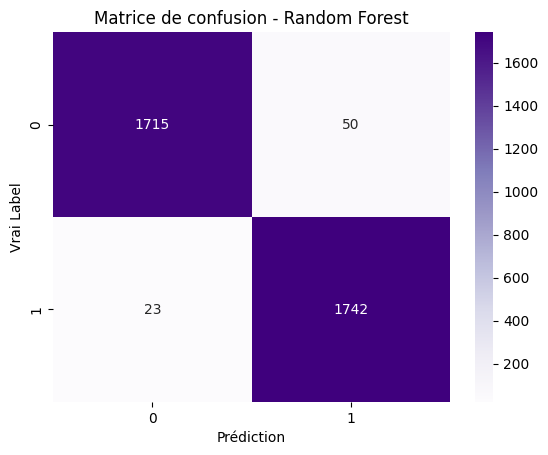

In [23]:
rf = RandomForestClassifier(n_estimators=150,class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

#Evaluation
from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Précision du modèle Random Forest: {accuracy_rf:.2f}")

print("Classification Report")
print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel("Prédiction")
plt.ylabel("Vrai Label")
plt.title("Matrice de confusion - Random Forest")
plt.show()

### **knn:**

Précision du modèle KNN: 0.93
F1 Score (KNN): 0.94
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1765
           1       0.90      0.98      0.94      1765

    accuracy                           0.93      3530
   macro avg       0.94      0.93      0.93      3530
weighted avg       0.94      0.93      0.93      3530



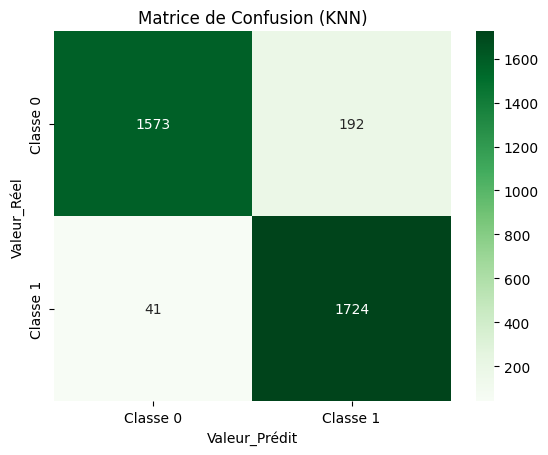

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Entraînement du modèle KNN sur les données équilibrées
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred_knn = knn.predict(X_test)

# Évaluation du modèle KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
print(f"Précision du modèle KNN: {accuracy_knn:.2f}")
print(f"F1 Score (KNN): {f1_knn:.2f}")

print(classification_report(y_test, y_pred_knn))

# Matrice de confusion pour le modèle KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Greens", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.xlabel("Valeur_Prédit")
plt.ylabel("Valeur_Réel")
plt.title("Matrice de Confusion (KNN)")
plt.show()

#### **Decision trees:**

Précision du modèle Decision Tree): 0.96
F1 Score (Decision Tree): 0.96
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1765
           1       0.96      0.97      0.96      1765

    accuracy                           0.96      3530
   macro avg       0.96      0.96      0.96      3530
weighted avg       0.96      0.96      0.96      3530



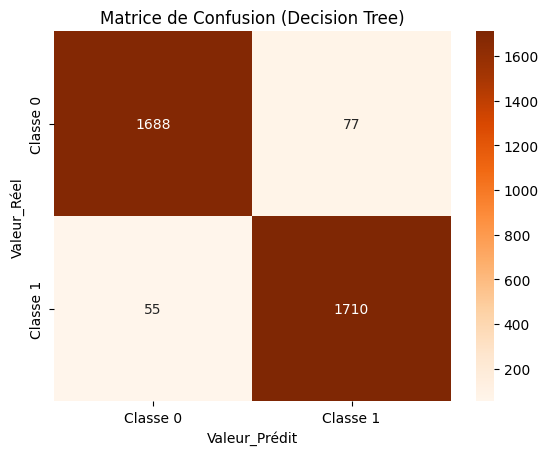

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Entraînement du modèle Decision Tree sur les données équilibrées
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred_dtree = dtree.predict(X_test)

# Évaluation du modèle Decision Tree
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
f1_dtree = f1_score(y_test, y_pred_dtree)
print(f"Précision du modèle Decision Tree): {accuracy_dtree:.2f}")
print(f"F1 Score (Decision Tree): {f1_dtree:.2f}")

print(classification_report(y_test, y_pred_dtree))

# Matrice de confusion pour le modèle Decision Tree
conf_matrix_dtree = confusion_matrix(y_test, y_pred_dtree)
sns.heatmap(conf_matrix_dtree, annot=True, fmt="d", cmap="Oranges", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.xlabel("Valeur_Prédit")
plt.ylabel("Valeur_Réel")
plt.title("Matrice de Confusion (Decision Tree)")
plt.show()

### **SVM:**

Précision du modèle SVM: 0.80
F1 Score (SVM): 0.81
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1765
           1       0.78      0.84      0.81      1765

    accuracy                           0.80      3530
   macro avg       0.81      0.80      0.80      3530
weighted avg       0.81      0.80      0.80      3530



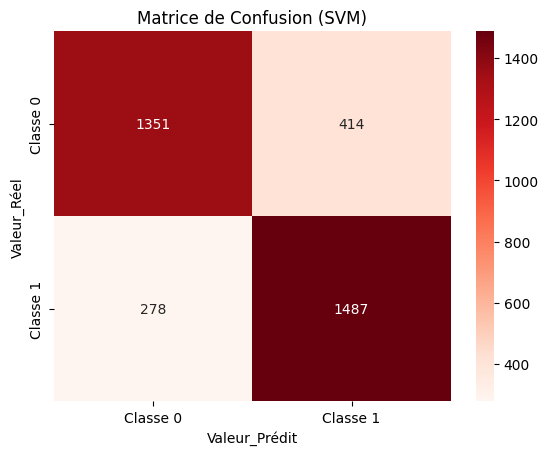

In [26]:
from sklearn.svm import SVC

# Entraînement du modèle SVM sur les données équilibrées
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred_svm = svm.predict(X_test)

# Évaluation du modèle SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print(f"Précision du modèle SVM: {accuracy_svm:.2f}")
print(f"F1 Score (SVM): {f1_svm:.2f}")

print(classification_report(y_test, y_pred_svm))

# Matrice de confusion pour le modèle SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Reds", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.xlabel("Valeur_Prédit")
plt.ylabel("Valeur_Réel")
plt.title("Matrice de Confusion (SVM)")
plt.show()

## ***Resultas:***

In [27]:
# Affichage des résultats
print(f"L'accuracy du Logistic Regression : {accuracy_logi:.2f}")
print(f"L'accuracy du modèle KNN : {accuracy_knn:.2f}")
print(f"L'accuracy du modèle Decision Tree : {accuracy_dtree:.2f}")
print(f"L'accuracy du modèle Random Forest : {accuracy_rf:.2f}")
print(f"L'accuracy du modèle SVM : {accuracy_svm:.2f}")


L'accuracy du Logistic Regression : 0.83
L'accuracy du modèle KNN : 0.93
L'accuracy du modèle Decision Tree : 0.96
L'accuracy du modèle Random Forest : 0.98
L'accuracy du modèle SVM : 0.80


### ***Rapport de classification:***

In [28]:
# Rapport de classification pour Logistic Regression
print("Rapport de classification : Logistic Regression")
print(classification_report(y_test, y_pred_logi))

# Rapport de classification pour KNN
print("\nRapport de classification : KNN")
print(classification_report(y_test, y_pred_knn))

# Rapport de classification pour Decision Tree
print("\nRapport de classification : Decision Tree")
print(classification_report(y_test, y_pred_dtree))

# Rapport de classification pour Random Forest
print("\nRapport de classification : Random Forest")
print(classification_report(y_test, y_pred_rf))

# Rapport de classification pour SVM
print("\nRapport de classification : SVM")
print(classification_report(y_test, y_pred_svm))

Rapport de classification : Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1765
           1       0.81      0.84      0.83      1765

    accuracy                           0.83      3530
   macro avg       0.83      0.83      0.83      3530
weighted avg       0.83      0.83      0.83      3530


Rapport de classification : KNN
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1765
           1       0.90      0.98      0.94      1765

    accuracy                           0.93      3530
   macro avg       0.94      0.93      0.93      3530
weighted avg       0.94      0.93      0.93      3530


Rapport de classification : Decision Tree
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1765
           1       0.96      0.97      0.96      1765

    accuracy                           0.96      3530
   m

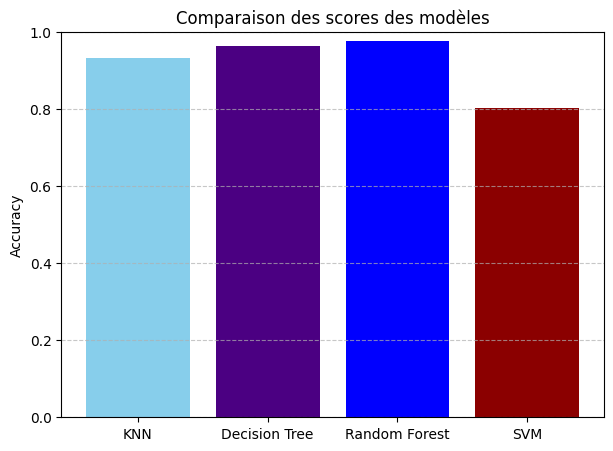

In [29]:
#Dictionnaire des modèles
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Stockage des scores
scores = {}

# Entraînement et évaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores[name] = acc

#  Tracer le graphe
plt.figure(figsize=(7, 5))
plt.bar(scores.keys(), scores.values(), color=['skyblue', 'Indigo', 'Blue', 'Darkred'])
plt.title('Comparaison des scores des modèles')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # scores entre 0 et 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Analyse de Survie avec CoxPH:

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\lifelines\fitters\coxph_fitter.py:1614: ConvergenceWarning: Newton-Raphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  warnings.warn(


<lifelines.CoxPHFitter: fitted with 9535 total observations, 9272 right-censored observations>
             duration col = 'RUL'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 9535
number of events observed = 263
   partial log-likelihood = -1098.91
         time fit was run = 2025-11-12 13:13:07 UTC

---
                         coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                
Type                    -0.12      0.89      0.11           -0.33            0.10                0.72                1.10
Air temperature [K]      0.76      2.13      0.07            0.62            0.90                1.86                2.45
Process temperature [K] -0.74      0.48      0.10           -0.93           -0.55                0.39                0.58
Rotational speed [rpm]  -0.00      1.00      0.00           -0.01           -0.00                0.99                1.00
Torque [Nm]              0.12      1.13      0.01            0.10            0.15                1.10                1.16
Tool wear [min]          0.18      1.20      0.01            0.16            0.21                1.18                1.23

                         cmp to     z      p  -log2(p)
covariate                                             
Type                       0.00 -1.08   0.28      1.84
Air temperature [K]        0.00 10.65 <0.005     85.61
Process temperature [K]    0.00 -7.70 <0.005     46.09
Rotational speed [rpm]     0.00 -2.58   0.01      6.68
Torque [Nm]                0.00  9.78 <0.005     72.66
Tool wear [min]            0.00 16.98 <0.005    212.41
---
Concordance = 0.99
Partial AIC = 2209.82
log-likelihood ratio test = 2321.65 on 6 df
-log2(p) of ll-ratio test = inf

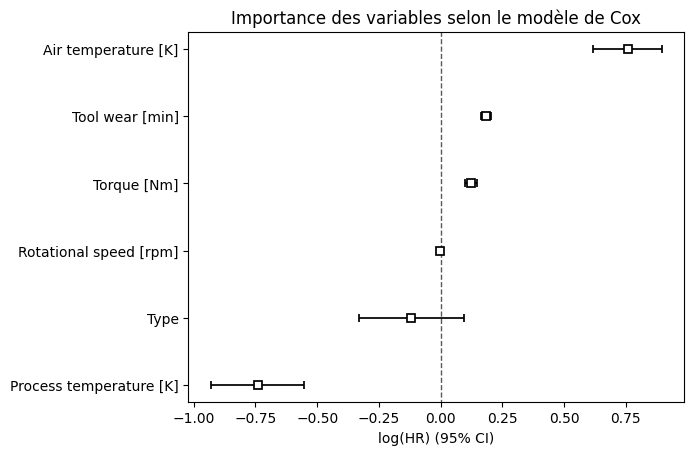

In [30]:
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

# Ajouter RUL
# # On a la durée max d’usure de l’outil = 253 min
df["RUL"] = 253 - df["Tool wear [min]"]

# Préparer le dataset
# # Construire le dataset pour Cox
cox_data = df.copy()

# Supprimer les colonnes non numériques
cox_data = cox_data.drop(columns=["UDI", "Product ID", "TWF", "HDF", "PWF", "OSF", "RNF","Machine failure"])

# # # Encoder les colonnes catégorielles 
# categorical_cols = cox_data.select_dtypes(include=['object']).columns
# cox_data = pd.get_dummies(cox_data, columns=categorical_cols, drop_first=True)

# Définir la durée et l'événement
cox_data["RUL"] = df["RUL"]
cox_data["event"] = df["Machine failure"]

# Fit du modèle de Cox
cph = CoxPHFitter()
cph.fit(cox_data, duration_col="RUL", event_col="event")

# Résumé
cph.print_summary()

# Visualisation
cph.plot()
plt.title("Importance des variables selon le modèle de Cox")
plt.show()


### Sauvegarde du modèle:

In [31]:
import pickle 
# save the model
with open('model_M_RF_1.pkl', 'wb') as file:
    pickle.dump(models['Random Forest'], file)

In [32]:
# load the model
with open('model_M_RF_1.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [33]:
#  Sauvegarder le modèle entraîné
import joblib
joblib.dump(cph, "coxph_1.pkl")

['coxph_1.pkl']

In [34]:
# Charger le modèle CoxPH
cox_model = joblib.load("coxph_1.pkl")